# **Predicting Employee Retention**

### Objective

The objective of this assignment is to develop a Logistic Regression model. You will be using this model to analyse and predict binary outcomes based on the input data. This assignment aims to enhance understanding of logistic regression, including its assumptions, implementation, and evaluation, to effectively classify and interpret data.


### Business Objective

A mid-sized technology company wants to improve its understanding of employee retention to foster a loyal and committed workforce. While the organization has traditionally focused on addressing turnover, it recognises the value of proactively identifying employees likely to stay and understanding the factors contributing to their loyalty.


In this assignment you’ll be building a logistic regression model to predict the likelihood of employee retention based on the data such as demographic details, job satisfaction scores, performance metrics, and tenure. The aim is to provide the HR department with actionable insights to strengthen retention strategies, create a supportive work environment, and increase the overall stability and satisfaction of the workforce.

## Assignment Tasks

You need to perform the following steps to complete this assignment:
1. Data Understanding
2. Data Cleaning
3. Train Validation Split
4. EDA on training data
5. EDA on validation data [Optional]
6. Feature Engineering
7. Model Building
8. Prediction and Model Evaluation




## Data Dictionary

The data has 24 Columns and 74610 Rows. Following data dictionary provides the description for each column present in dataset:<br>

<table>
  <thead>
    <tr>
      <th>Column Name</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Employee ID</td>
      <td>A unique identifier assigned to each employee.</td>
    </tr>
    <tr>
      <td>Age</td>
      <td>The age of the employee, ranging from 18 to 60 years.</td>
    </tr>
    <tr>
      <td>Gender</td>
      <td>The gender of the employee.</td>
    </tr>
    <tr>
      <td>Years at Company</td>
      <td>The number of years the employee has been working at the company.</td>
    </tr>
    <tr>
      <td>Monthly Income</td>
      <td>The monthly salary of the employee, in dollars.</td>
    </tr>
    <tr>
      <td>Job Role</td>
      <td>The department or role the employee works in, encoded into categories such as Finance, Healthcare, Technology, Education, and Media.</td>
    </tr>
    <tr>
      <td>Work-Life Balance</td>
      <td>The employee's perceived balance between work and personal life (Poor, Below Average, Good, Excellent).</td>
    </tr>
    <tr>
      <td>Job Satisfaction</td>
      <td>The employee's satisfaction with their job (Very Low, Low, Medium, High).</td>
    </tr>
    <tr>
      <td>Performance Rating</td>
      <td>The employee's performance rating (Low, Below Average, Average, High).</td>
    </tr>
    <tr>
      <td>Number of Promotions</td>
      <td>The total number of promotions the employee has received.</td>
    </tr>
     </tr>
     <tr>
      <td>Overtime</td>
      <td>Number of overtime hours.</td>
    </tr>
    <tr>
      <td>Distance from Home</td>
      <td>The distance between the employee's home and workplace, in miles.</td>
    </tr>
    <tr>
      <td>Education Level</td>
      <td>The highest education level attained by the employee (High School, Associate Degree, Bachelor’s Degree, Master’s Degree, PhD).</td>
    </tr>
    <tr>
      <td>Marital Status</td>
      <td>The marital status of the employee (Divorced, Married, Single).</td>
    </tr>
     <tr>
      <td>Number of Dependents</td>
      <td>Number of dependents the employee has.</td>
    </tr>
    <tr>
      <td>Job Level</td>
      <td>The job level of the employee (Entry, Mid, Senior).</td>
    </tr>
    <tr>
      <td>Company Size</td>
      <td>The size of the company the employee works for (Small, Medium, Large).</td>
    </tr>
    <tr>
      <td>Company Tenure (In Months)</td>
      <td>The total number of years the employee has been working in the industry.</td>
    </tr>
    <tr>
      <td>Remote Work</td>
      <td>Whether the employee works remotely (Yes or No).</td>
    </tr>
    <tr>
      <td>Leadership Opportunities</td>
      <td>Whether the employee has leadership opportunities (Yes or No).</td>
    </tr>
    <tr>
      <td>Innovation Opportunities</td>
      <td>Whether the employee has opportunities for innovation (Yes or No).</td>
    </tr>
    <tr>
      <td>Company Reputation</td>
      <td>The employee's perception of the company's reputation (Very Poor, Poor, Good, Excellent).</td>
    </tr>
    <tr>
      <td>Employee Recognition</td>
      <td>The level of recognition the employee receives(Very Low, Low, Medium, High).</td>
    </tr>
    <tr>
      <td>Attrition</td>
      <td>Whether the employee has left the company.</td>
    </tr>
  </tbody>
</table>


## **1. Data Understanding**

In this step, load the dataset and check basic statistics of the data, including preview of data, dimension of data, column descriptions and data types.

### **1.0 Import Libraries**

In [195]:
# Supress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [196]:
# Import the libraries
import numpy as np
import pandas as pd

### **1.1 Load the Data**

In [197]:
# Load the dataset
df=pd.read_csv("Employee_data.csv")

In [198]:
# Check the first few entries
df.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure (In Months),Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89.0,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21.0,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74.0,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50.0,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68.0,No,No,No,Fair,Medium,Stayed


In [199]:
# Inspect the shape of the dataset
df.shape

(74610, 24)

In [200]:
# Inspect the different columns in the dataset
df.columns

Index(['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role',
       'Monthly Income', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level', 'Marital Status',
       'Number of Dependents', 'Job Level', 'Company Size',
       'Company Tenure (In Months)', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition', 'Attrition'],
      dtype='object')

### **1.2 Check the basic statistics**

In [201]:
# Check the summary of the dataset
df.describe()

,Employee ID,Age,Years at Company,Monthly Income,Number of Promotions,Distance from Home,Number of Dependents,Company Tenure (In Months)
count,74610.000000,74610.000000,74610.000000,74610.000000,74610.000000,72698.000000,74610.000000,72197.000000
mean,37246.028696,38.529379,15.722638,7344.931417,0.832958,49.990839,1.657432,55.711899
std,21505.785344,12.082299,11.224059,2596.373589,0.995326,28.519135,1.579862,25.392325
min,1.000000,18.000000,1.000000,1226.000000,0.000000,1.000000,0.000000,2.000000
25%,18624.250000,28.000000,7.000000,5652.000000,0.000000,25.000000,0.000000,36.000000
50%,37239.500000,39.000000,13.000000,7348.500000,1.000000,50.000000,1.000000,56.000000
75%,55871.750000,49.000000,23.000000,8876.000000,2.000000,75.000000,3.000000,76.000000
max,74498.000000,59.000000,51.000000,50030.000000,4.000000,99.000000,15.000000,128.000000


### **1.3 Check the data type of columns**

In [202]:
# Check the info to see the types of the feature variables and the null values present
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74610 entries, 0 to 74609
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee ID                 74610 non-null  int64  
 1   Age                         74610 non-null  int64  
 2   Gender                      74610 non-null  object 
 3   Years at Company            74610 non-null  int64  
 4   Job Role                    74610 non-null  object 
 5   Monthly Income              74610 non-null  int64  
 6   Work-Life Balance           74610 non-null  object 
 7   Job Satisfaction            74610 non-null  object 
 8   Performance Rating          74610 non-null  object 
 9   Number of Promotions        74610 non-null  int64  
 10  Overtime                    74610 non-null  object 
 11  Distance from Home          72698 non-null  float64
 12  Education Level             74610 non-null  object 
 13  Marital Status              746

## **2. Data Cleaning** <font color = red>[15 marks]</font>

### **2.1 Handle the missing values** <font color = red>[10 marks]</font>

2.1.1 Check the number of missing values <font color="red">[2 Mark]</font>

In [203]:
# Check the number of missing values in each column
df.isnull().sum()

Employee ID                      0
Age                              0
Gender                           0
Years at Company                 0
Job Role                         0
Monthly Income                   0
Work-Life Balance                0
Job Satisfaction                 0
Performance Rating               0
Number of Promotions             0
Overtime                         0
Distance from Home            1912
Education Level                  0
Marital Status                   0
Number of Dependents             0
Job Level                        0
Company Size                     0
Company Tenure (In Months)    2413
Remote Work                      0
Leadership Opportunities         0
Innovation Opportunities         0
Company Reputation               0
Employee Recognition             0
Attrition                        0
dtype: int64

2.1.2 Check the percentage of missing values <font color="red">[2 Marks]</font>

In [204]:
# Check the percentage of missing values in each column
df.isnull().sum()/len(df)*100

Employee ID                   0.000000
Age                           0.000000
Gender                        0.000000
Years at Company              0.000000
Job Role                      0.000000
Monthly Income                0.000000
Work-Life Balance             0.000000
Job Satisfaction              0.000000
Performance Rating            0.000000
Number of Promotions          0.000000
Overtime                      0.000000
Distance from Home            2.562659
Education Level               0.000000
Marital Status                0.000000
Number of Dependents          0.000000
Job Level                     0.000000
Company Size                  0.000000
Company Tenure (In Months)    3.234151
Remote Work                   0.000000
Leadership Opportunities      0.000000
Innovation Opportunities      0.000000
Company Reputation            0.000000
Employee Recognition          0.000000
Attrition                     0.000000
dtype: float64

2.1.3 Handle rows with missing values <font color="red">[4 Marks]</font>

In [205]:
# Handle the missing value rows in the column
missing_values=df["Distance from Home"]=df["Distance from Home"].fillna(df["Distance from Home"].median())
missing_values=df["Company Tenure (In Months)"]=df["Company Tenure (In Months)"].fillna(df["Company Tenure (In Months)"].median())

2.1.4 Check percentage of remaning data after missing values are removed <font color="red">[2 Mark]</font>

In [206]:
# Check the percentage of remaining data after missing values are removed
original_data=df.shape[0]
missing_data=df[df.isnull().any(axis=1)].shape[0]
total_data=original_data-missing_data
remaining_percent=(total_data/original_data)*100
remaining_percent

100.0

### **2.2 Identify and handle redundant values within categorical columns (if any)** <font color = red>[3 marks]</font>

Examine the categorical columns to determine if any value or column needs to be treated

In [207]:
# Write a function to display the categorical columns with their unique values and check for redundant values
cat_cols=df.select_dtypes(include=["object"]).columns

In [208]:
# Check the data
cat_cols

Index(['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Overtime', 'Education Level', 'Marital Status',
       'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition', 'Attrition'],
      dtype='object')

### **2.3 Drop redundant columns** <font color = red>[2 marks]</font>

In [209]:
# Drop redundant columns which are not required for modelling
cat_cols=df.select_dtypes(include='object').columns
for col in cat_cols:
    if df[col].nunique()==1:
     df.drop(columns=col,inplace=True)
    cat_cols

In [210]:
# Check first few rows of data
cat_cols

Index(['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Overtime', 'Education Level', 'Marital Status',
       'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition', 'Attrition'],
      dtype='object')

## **3. Train-Validation Split** <font color = red>[5 marks]</font>

### **3.1 Import required libraries**

In [211]:
# Import Train Test Split
from sklearn.model_selection import train_test_split

### **3.2 Define feature and target variables** <font color = red>[2 Mark]</font>

In [212]:
# Put all the feature variables in X
X=df.drop(["Attrition"],axis=1)
# Put the target variable in y
y=df["Attrition"]

### **3.3 Split the data** <font color="red">[3 Marks]</font>

In [213]:
# Split the data into 70% train data and 30% validation data
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

## **4. EDA on training data** <font color = red>[20 marks]</font>

### **4.1 Perform univariate analysis** <font color = red>[6 marks]</font>

Perform univariate analysis on training data for all the numerical columns.




4.1.1 Select numerical columns from training data <font color = "red">[1 Mark]</font>

In [214]:
# Select numerical columns
num_cols=X_train.select_dtypes(include=['int64','float64']).columns
num_cols

Index(['Employee ID', 'Age', 'Years at Company', 'Monthly Income',
       'Number of Promotions', 'Distance from Home', 'Number of Dependents',
       'Company Tenure (In Months)'],
      dtype='object')

4.1.2 Plot distribution of numerical columns <font color = "red">[5 Marks]</font>

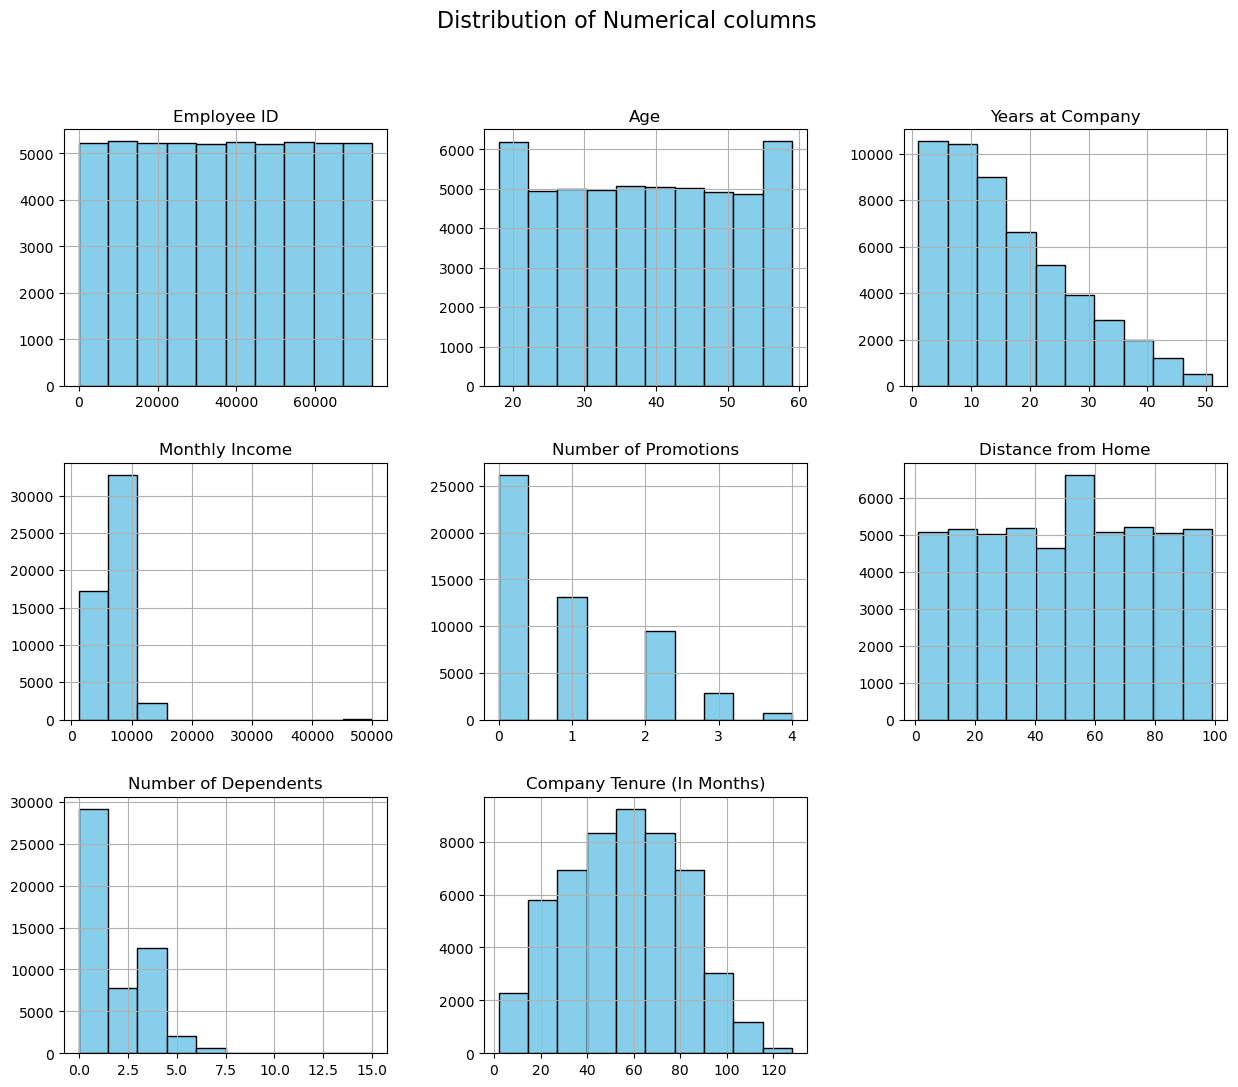

In [215]:
# Plot all the numerical columns to understand their distribution
import matplotlib.pyplot as plt
X_train.select_dtypes(include=['int64','float64']).hist(figsize=(15,12),color="skyblue",edgecolor="black")
plt.suptitle("Distribution of Numerical columns",fontsize=16)
plt.show()
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt


### **4.2 Perform correlation analysis** <font color="red">[4 Marks]</font>

Check the correlation among different numerical variables.

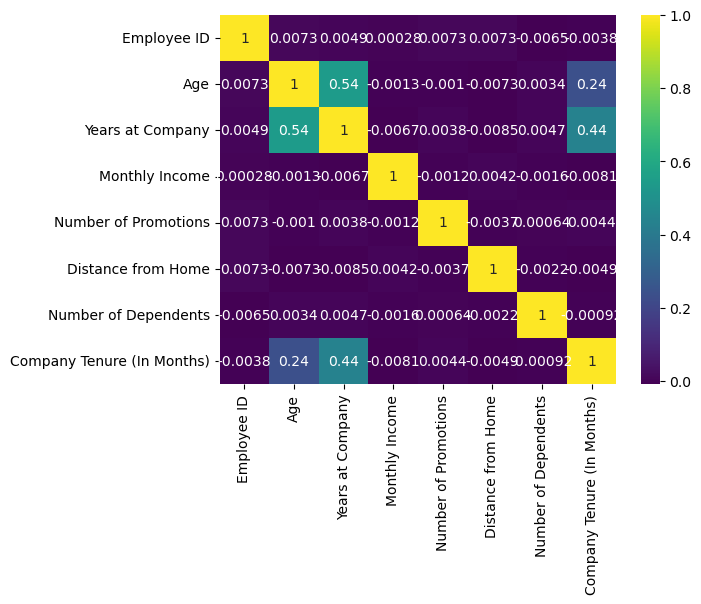

In [216]:
# Create correlation matrix for numerical columns
corr_matrix=X_train[num_cols].corr()
# Plot Heatmap of the correlation matrix
sns.heatmap(X_train[num_cols].corr(),cmap="viridis",annot=True)
plt.show()

### **4.3 Check class balance** <font color="red">[2 Marks]</font>

Check the distribution of target variable in training set to check class balance.

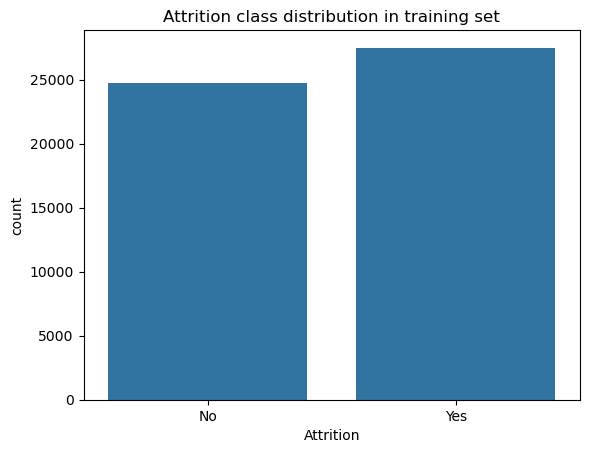

In [217]:
# Plot a bar chart to check class balance
sns.countplot(x=y_train)
plt.title("Attrition class distribution in training set")
plt.xlabel("Attrition")
plt.ylabel("count")
plt.xticks([0,1],["No","Yes"])
plt.show()

### **4.4 Perform bivariate analysis** <font color="red">[8 Marks]</font>

Perform bivariate analysis on training data between all the categorical columns and target variable to  analyse how the categorical variables influence the target variable.

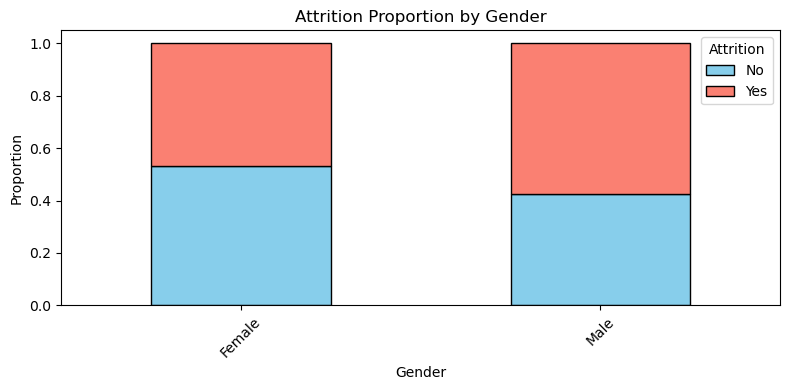

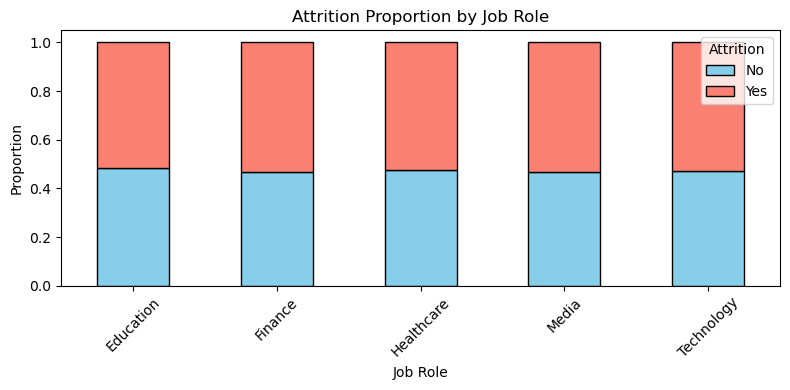

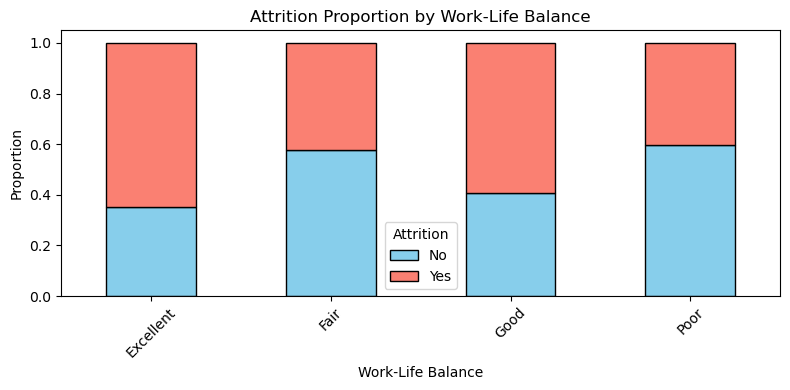

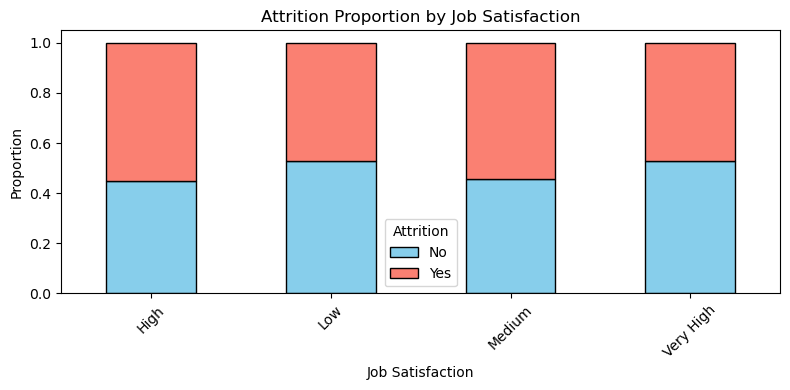

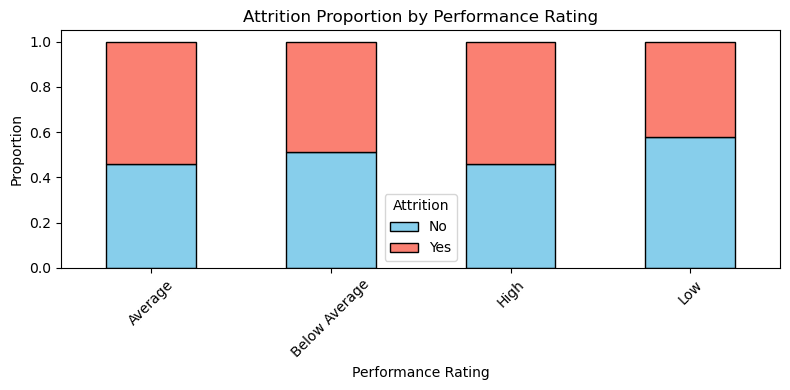

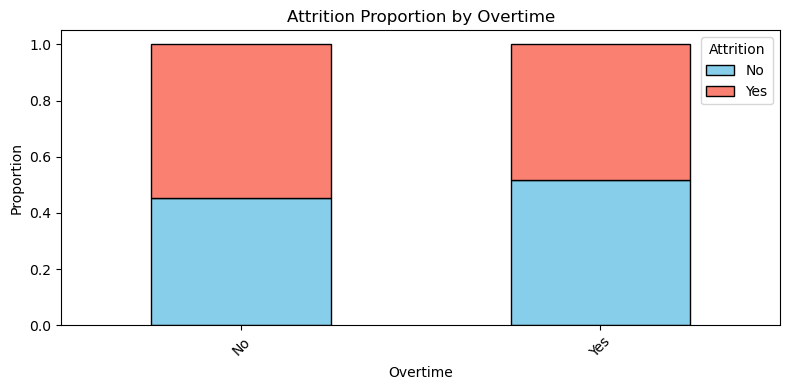

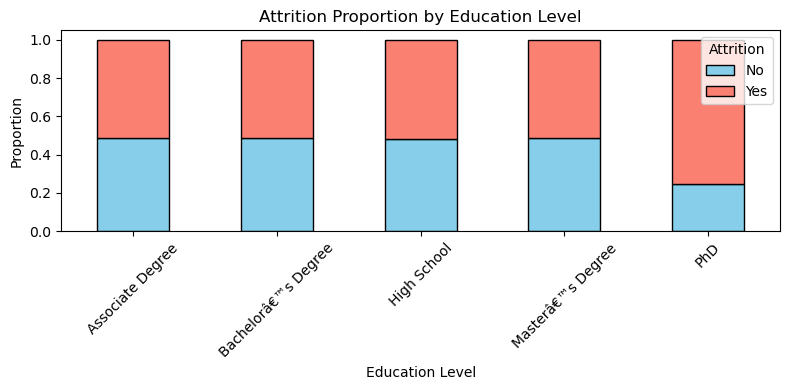

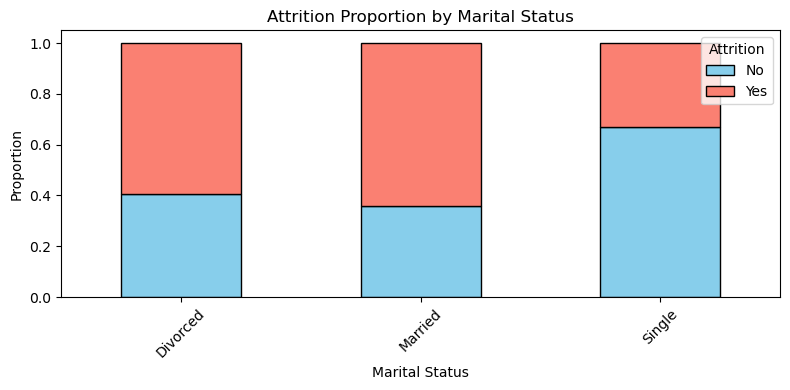

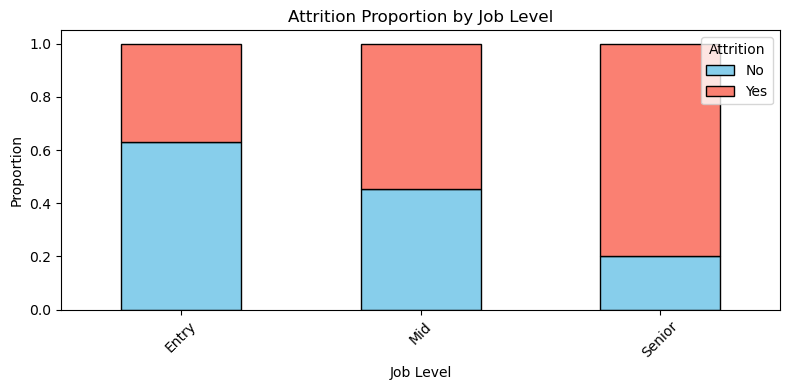

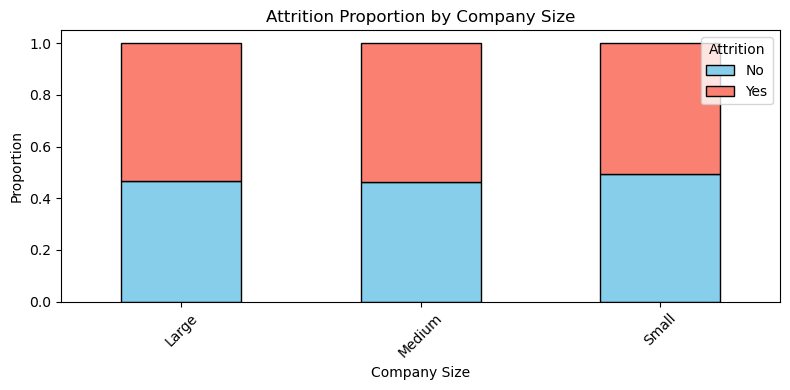

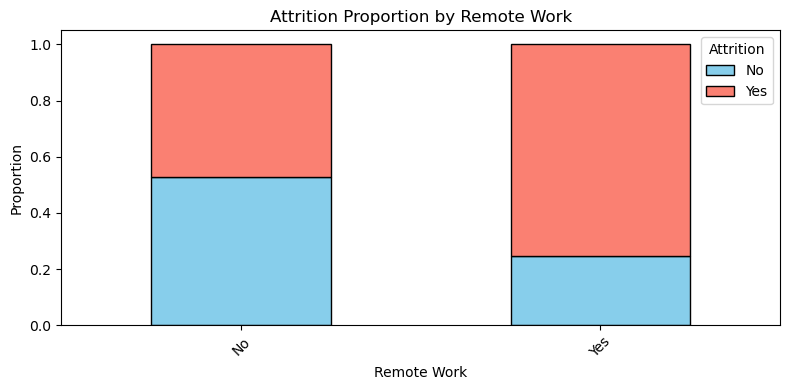

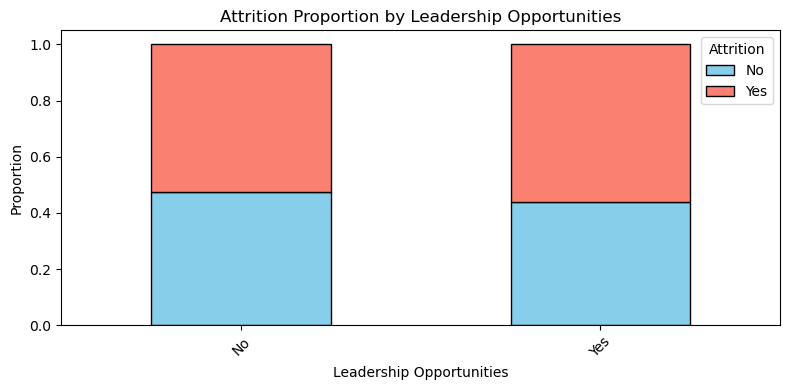

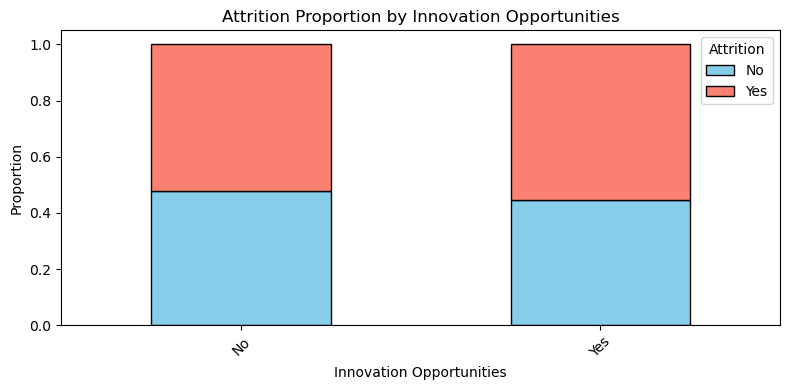

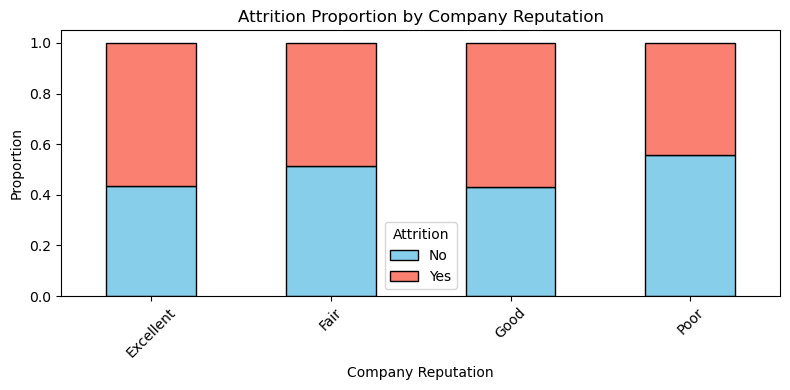

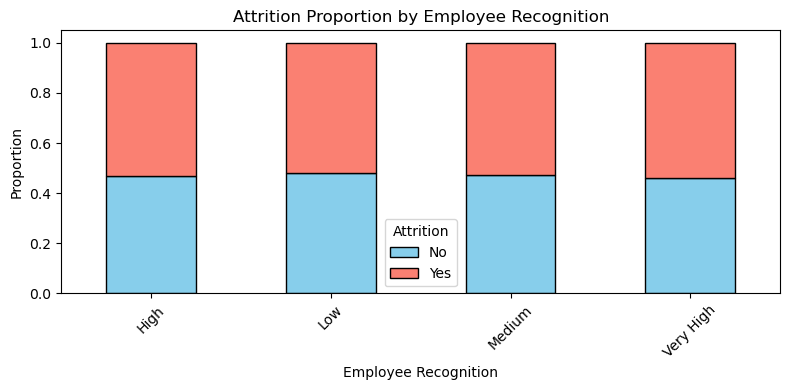

In [218]:
# Plot distribution for each categorical column with target variable
for col in X_train.select_dtypes(include=["object","category"]):
 pd.crosstab(X_train[col],y_train,normalize="index").plot(kind="bar",stacked=True,figsize=(8,4),color=["skyblue","salmon"],edgecolor="black")
 plt.title(f'Attrition Proportion by {col}')
 plt.xlabel(col)
 plt.ylabel("Proportion")
 plt.legend(["No","Yes"],title="Attrition")
 plt.xticks(rotation=45)
 plt.tight_layout()
plt.show()

## **5. EDA on validation data** <font color = red>[OPTIONAL]</font>

### **5.1 Perform univariate analysis**

Perform univariate analysis on validation data for all the numerical columns.


5.1.1 Select numerical columns from validation data

In [219]:
# Select numerical columns
num_cols=X_test.select_dtypes(include=['int64','float64']).columns
num_cols

Index(['Employee ID', 'Age', 'Years at Company', 'Monthly Income',
       'Number of Promotions', 'Distance from Home', 'Number of Dependents',
       'Company Tenure (In Months)'],
      dtype='object')

5.1.2 Plot distribution of numerical columns

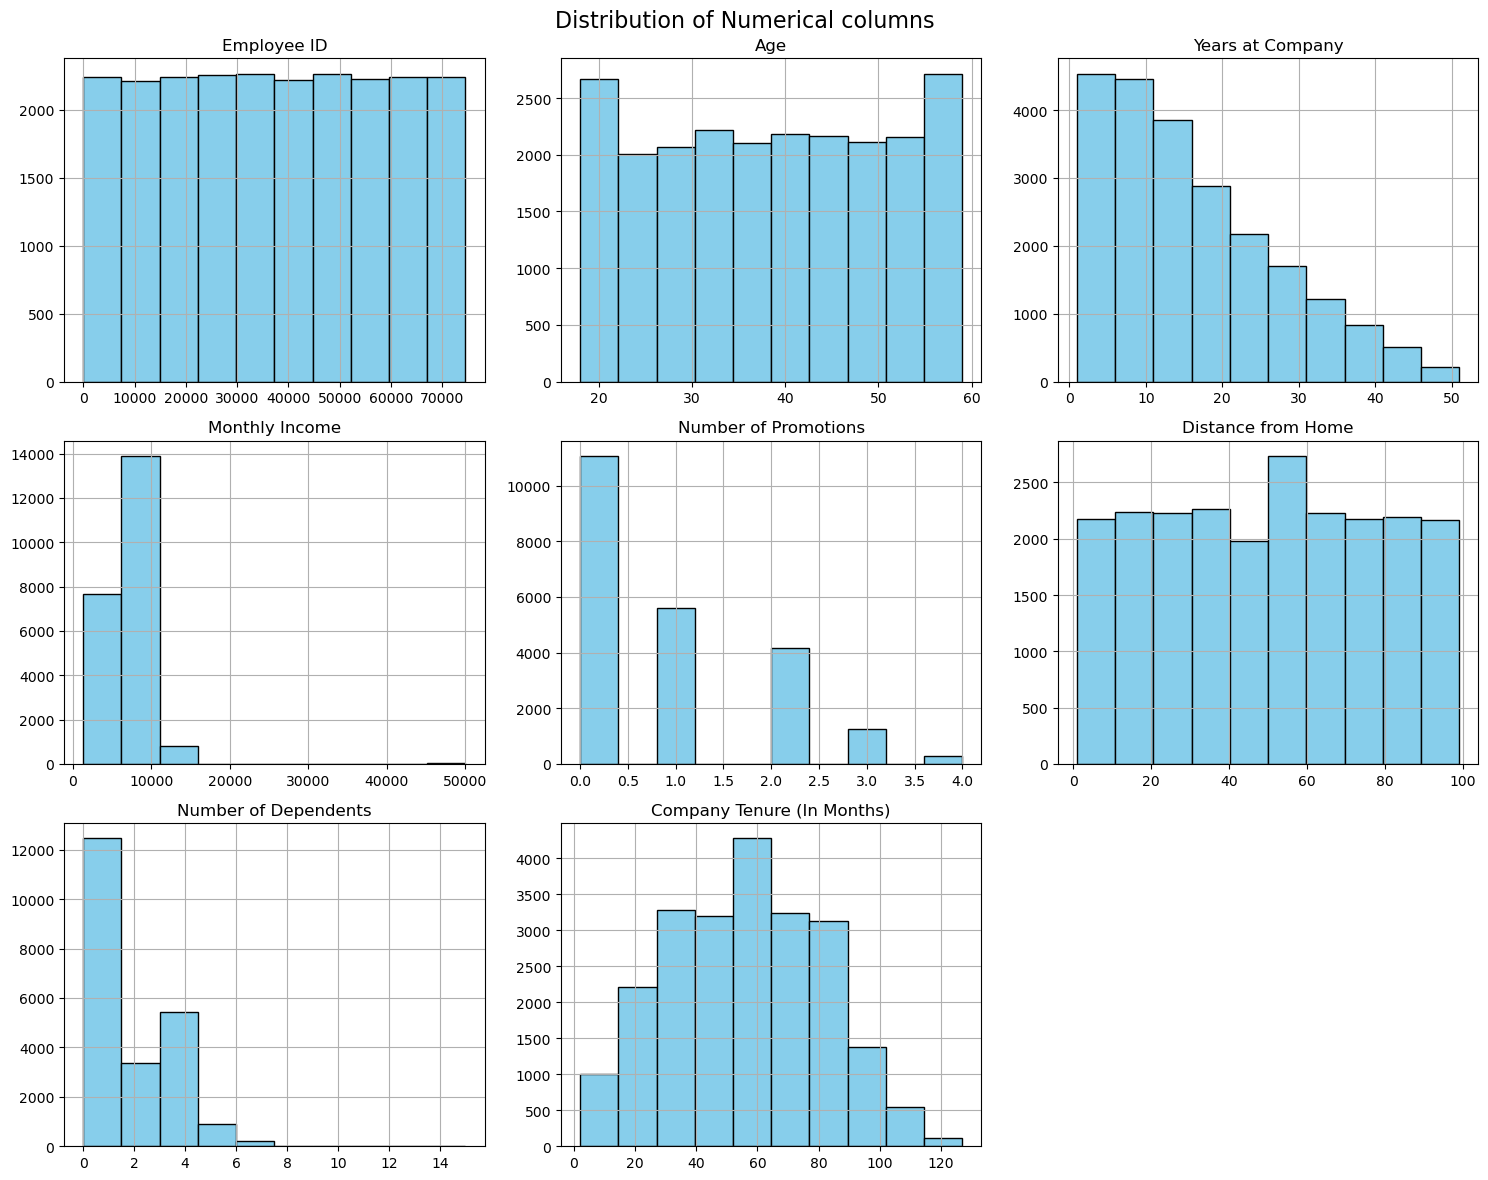

In [220]:
# Plot all the numerical columns to understand their distribution
X_test.select_dtypes(include=['int64','float64']).hist(figsize=(15,12),color="skyblue",edgecolor="black")
plt.suptitle("Distribution of Numerical columns",fontsize=16)
plt.tight_layout()
plt.show()
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

### **5.2 Perform correlation analysis**

Check the correlation among different numerical variables.

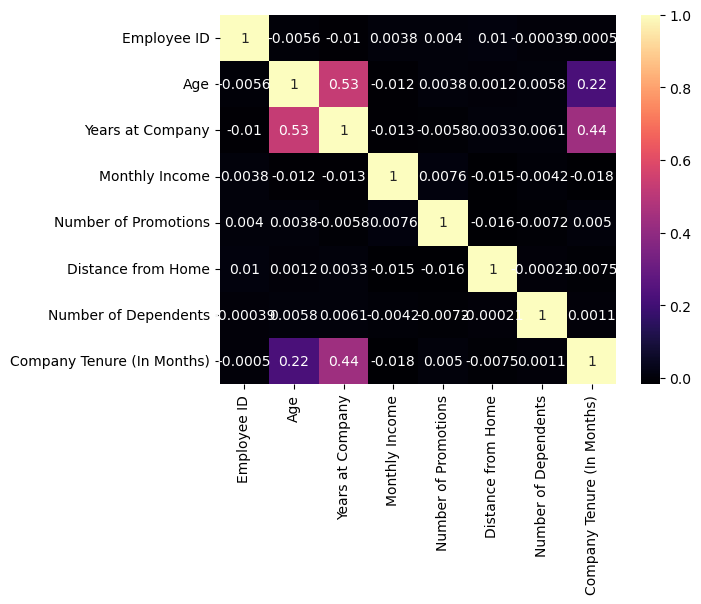

In [221]:
# Create correlation matrix for numerical columns
corr_matrix=X_test[num_cols].corr()
# Plot Heatmap of the correlation matrix
sns.heatmap(X_test[num_cols].corr(),cmap="magma",annot=True)
plt.show()

### **5.3 Check class balance**

Check the distribution of target variable in validation data to check class balance.

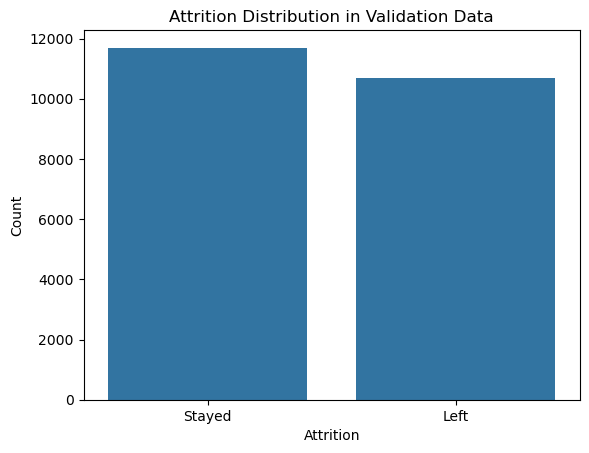

Attrition
Stayed    52.253943
Left      47.746057
Name: proportion, dtype: float64


In [222]:
# Plot a bar chart to check class balance
y_test_df = pd.DataFrame(y_test, columns=["Attrition"])
sns.countplot(x="Attrition",data=y_test_df)
plt.title("Attrition Distribution in Validation Data")
plt.xlabel("Attrition")
plt.ylabel("Count")
plt.show()
print(y_test.value_counts(normalize=True) * 100)
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

### **5.4 Perform bivariate analysis**

Perform bivariate analysis on validation data between all the categorical columns and target variable to analyse how the categorical variables influence the target variable.

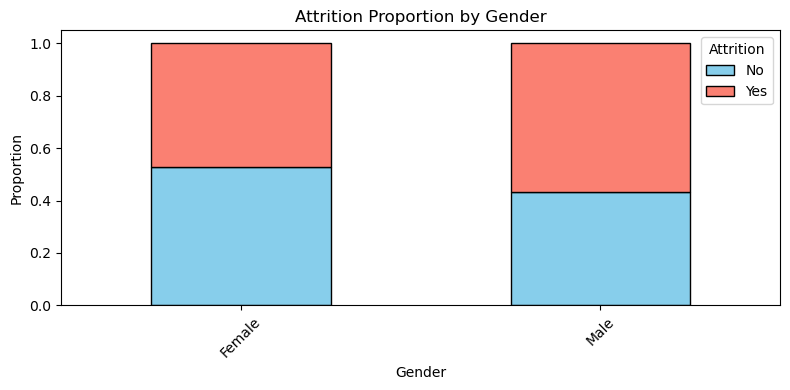

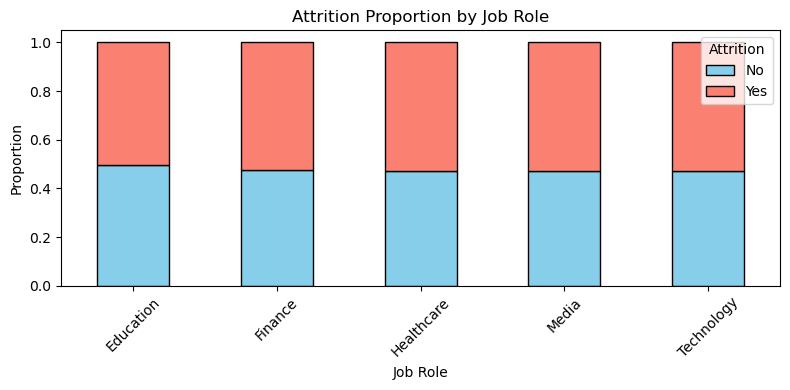

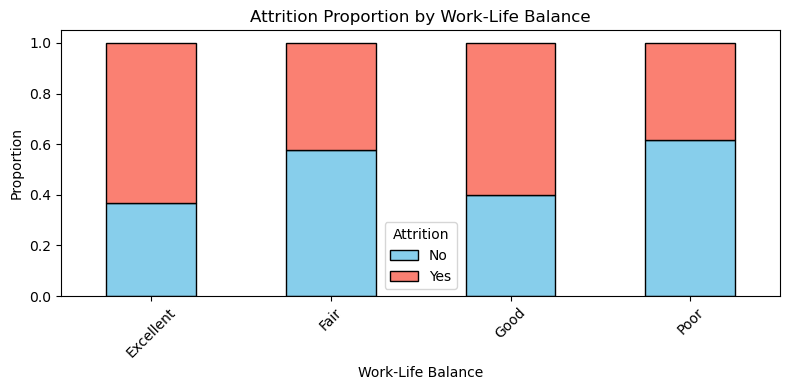

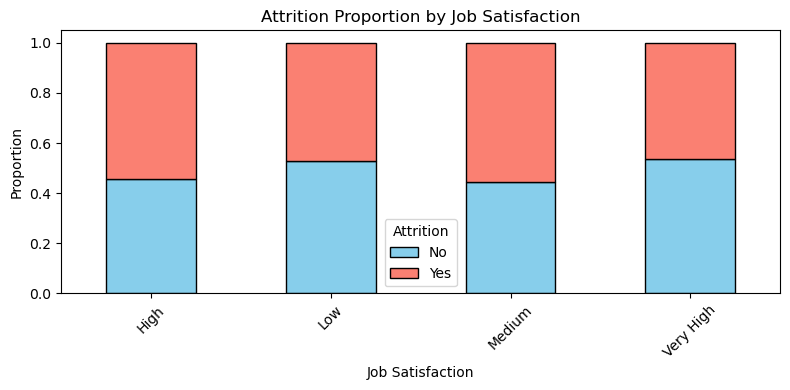

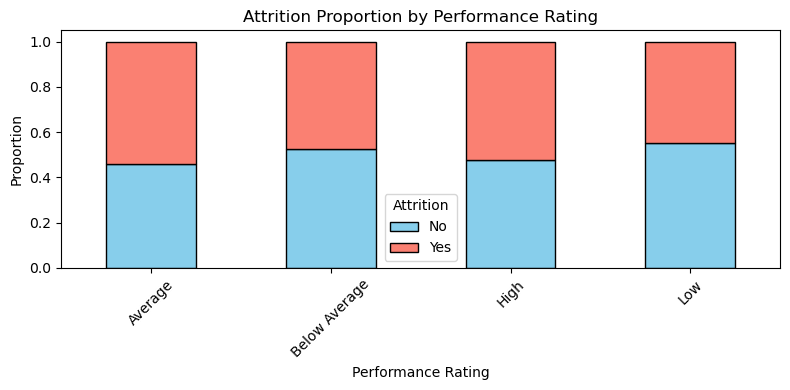

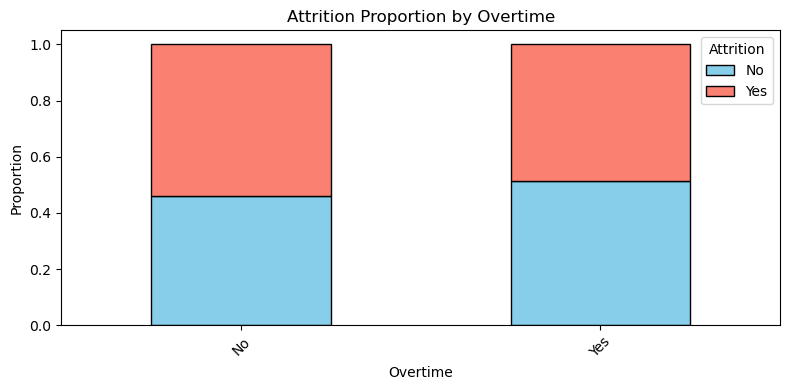

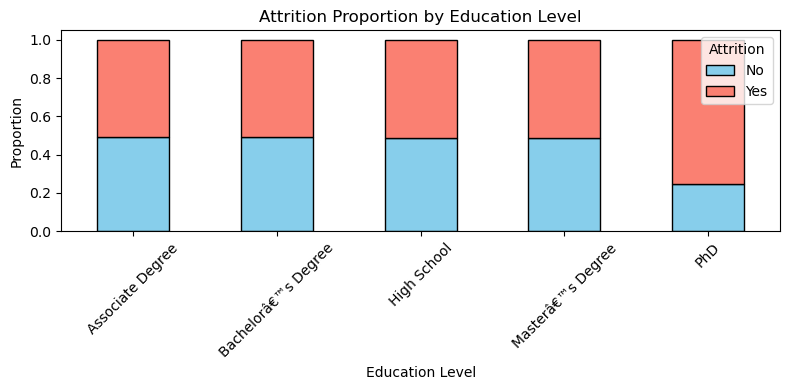

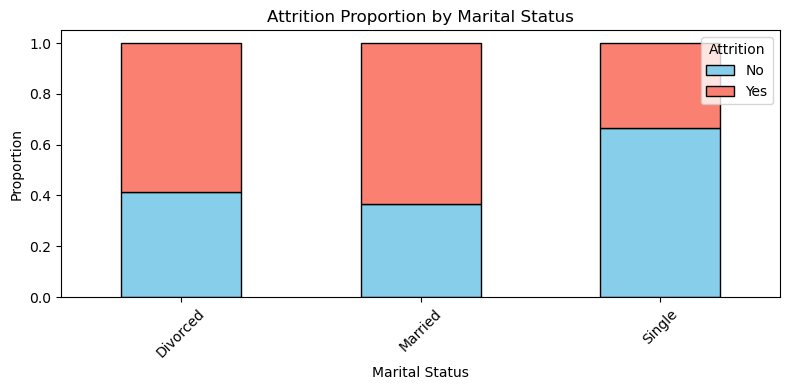

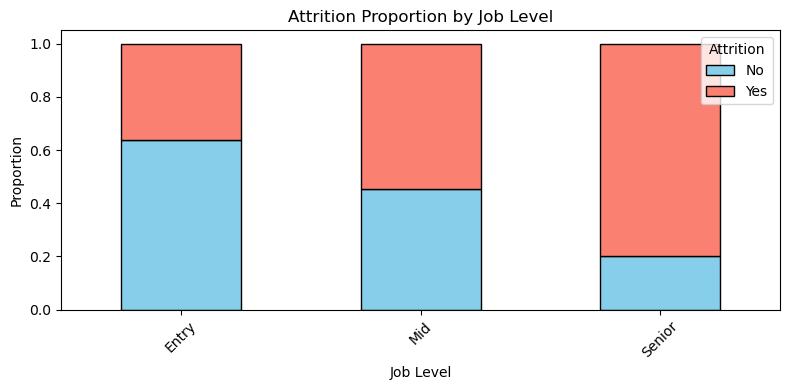

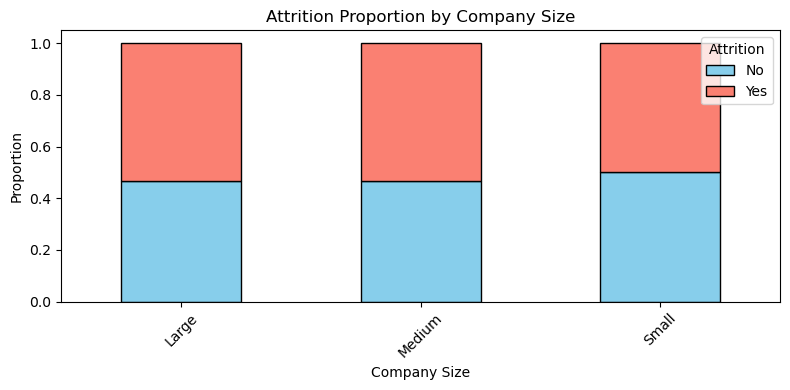

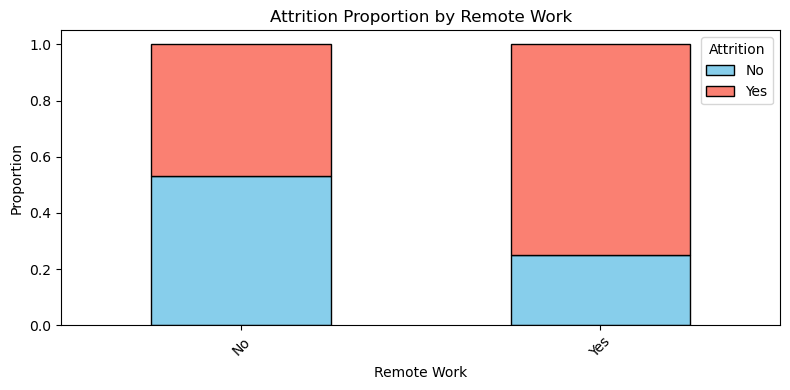

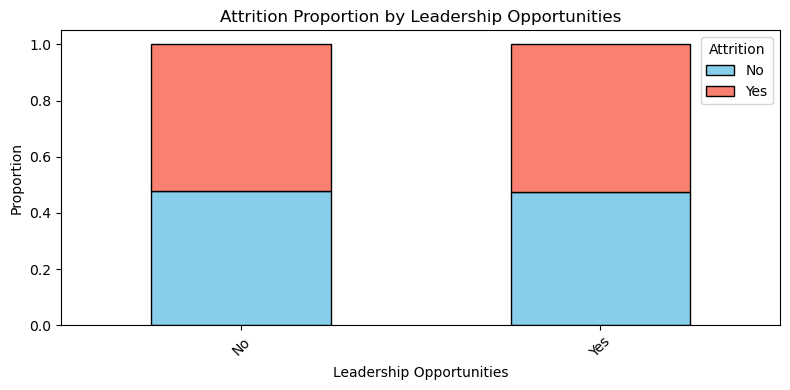

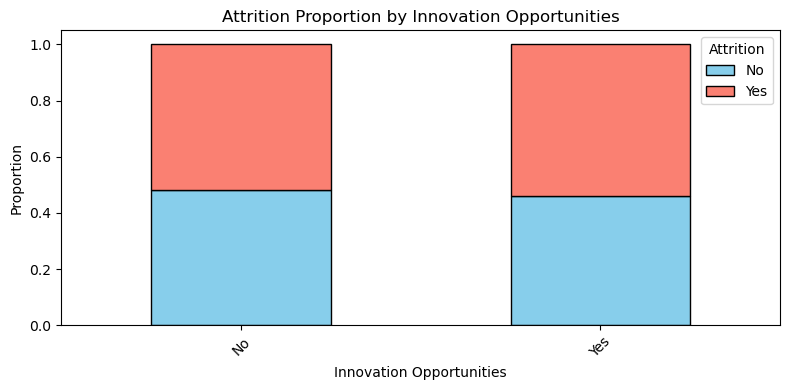

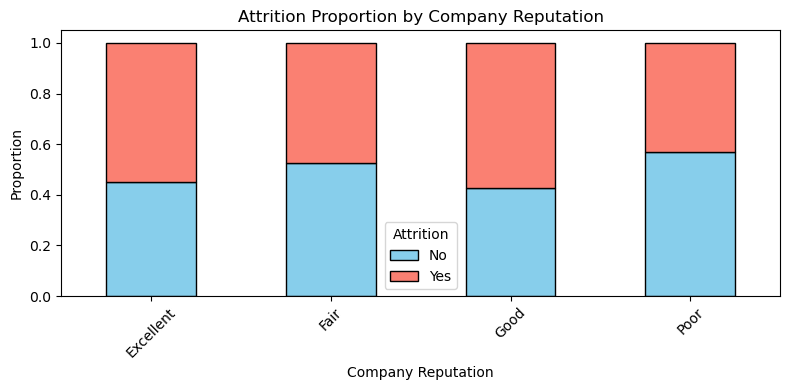

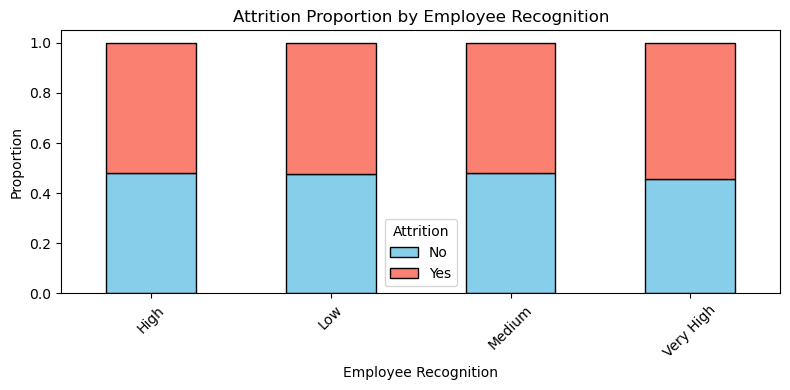

In [223]:
# Plot distribution for each categorical column with target variable
for col in X_test.select_dtypes(include=["object","category"]):
 pd.crosstab(X_test[col],y_test,normalize="index").plot(kind="bar",stacked=True,figsize=(8,4),color=["skyblue","salmon"],edgecolor="black")
 plt.title(f'Attrition Proportion by {col}')
 plt.xlabel(col)
 plt.ylabel("Proportion")
 plt.legend(["No","Yes"],title="Attrition")
 plt.xticks(rotation=45)
 plt.tight_layout()
plt.show()

## **6. Feature Engineering** <font color = red>[20 marks]</font>

### **6.1 Dummy variable creation** <font color = red>[15 marks]</font>


The next step is to deal with the categorical variables present in the data.

6.1.1 Identify categorical columns where dummy variables are required <font color="red">[1 Mark]</font>

In [224]:
# Check the categorical columns
cat_cols=X_train.select_dtypes(include=["object","category"]).columns
multi_cat_cols=[col for col in cat_cols if X_train[col].nunique()>2]
cat_cols

Index(['Gender', 'Job Role', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Overtime', 'Education Level', 'Marital Status',
       'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition'],
      dtype='object')

6.1.2 Create dummy variables for independent columns in training set <font color="red">[3 Marks]</font>

In [225]:
# Create dummy variables using the 'get_dummies' for independent columns
X_train_dummies=pd.get_dummies(X_train[multi_cat_cols],drop_first=True)
# Add the results to the master DataFrame
X_train=pd.concat([X_train,X_train_dummies],axis=1)

Now, drop the original categorical columns and check the DataFrame

In [226]:
# Drop the original categorical columns and check the DataFrame
X_train.drop(columns=multi_cat_cols,inplace=True)
X_train.head()

,Employee ID,Age,Gender,Years at Company,Monthly Income,Number of Promotions,Overtime,Distance from Home,Number of Dependents,Company Tenure (In Months),...,Job Level_Mid,Job Level_Senior,Company Size_Medium,Company Size_Small,Company Reputation_Fair,Company Reputation_Good,Company Reputation_Poor,Employee Recognition_Low,Employee Recognition_Medium,Employee Recognition_Very High
60704,59531,33,Female,23,6379,0,No,40.0,2,39.0,...,False,False,True,False,True,False,False,False,False,False
16163,23769,52,Male,3,3776,1,Yes,93.0,2,27.0,...,True,False,False,True,False,False,True,True,False,False
25709,7634,36,Female,20,12194,0,Yes,21.0,2,45.0,...,True,False,True,False,False,True,False,False,True,False
4354,8742,46,Female,7,7591,0,No,96.0,1,21.0,...,False,False,True,False,False,True,False,False,False,False
49862,74200,35,Male,26,5028,1,Yes,28.0,0,42.0,...,False,False,False,True,False,True,False,True,False,False


6.1.3 Create dummy variables for independent columns in validation set <font color="red">[3 Marks]</font>

In [227]:
# Create dummy variables using the 'get_dummies' for independent columns
X_test_dummies=pd.get_dummies(X_test[multi_cat_cols],drop_first=True)
# Add the results to the master DataFrame
X_test=pd.concat([X_test,X_test_dummies],axis=1)

Now, drop the original categorical columns and check the DataFrame

In [228]:
# Drop categorical columns and check the DataFrame
X_test.drop(columns=multi_cat_cols,inplace=True)
X_test.head()

,Employee ID,Age,Gender,Years at Company,Monthly Income,Number of Promotions,Overtime,Distance from Home,Number of Dependents,Company Tenure (In Months),...,Job Level_Mid,Job Level_Senior,Company Size_Medium,Company Size_Small,Company Reputation_Fair,Company Reputation_Good,Company Reputation_Poor,Employee Recognition_Low,Employee Recognition_Medium,Employee Recognition_Very High
61539,56957,58,Male,43,10970,0,No,53.0,0,57.0,...,False,True,True,False,False,True,False,False,True,False
42583,26041,18,Female,6,9242,0,Yes,31.0,3,63.0,...,True,False,False,False,False,True,False,False,False,False
55936,4435,49,Male,15,5171,0,No,55.0,3,47.0,...,False,False,True,False,False,True,False,False,True,False
66035,38945,46,Female,18,8151,2,No,42.0,0,30.0,...,True,False,False,False,False,True,False,False,True,False
23119,69132,43,Male,22,8304,1,No,50.0,2,76.0,...,False,False,True,False,False,False,True,False,True,False


6.1.4 Create DataFrame for dependent column in both training and validation set <font color = "red">[1 Mark]</font>

In [229]:
# Convert y_train and y_validation to DataFrame to create dummy variables
y_train=pd.DataFrame(y_train,columns=["Attrition"])
y_test=pd.DataFrame(y_test,columns=["Attrition"])

6.1.5 Create dummy variables for dependent column in training set <font color="red">[3 Marks]</font>

In [230]:
# Create dummy variables using the 'get_dummies' for dependent column
Y_train_dummies=pd.get_dummies(y_train["Attrition"],drop_first=True)

6.1.6 Create dummy variable for dependent column in validation set <font color = "red">[3 Marks]</font>

In [231]:
# Create dummy variables using the 'get_dummies' for dependent column
Y_test_dummies=pd.get_dummies(y_test["Attrition"],drop_first=True)

6.1.7 Drop redundant columns <font color="red">[1 Mark]</font>

In [232]:
# Drop redundant columns from both train and validation
reduntant_cols=[col for col in X_train.columns if X_train[col].nunique()<=1]
X_train.drop(columns=reduntant_cols,inplace=True)
X_test.drop(columns=reduntant_cols,inplace=True)

### **6.2 Feature scaling** <font color = red>[5 marks]</font>

Apply feature scaling to the numeric columns to bring them to a common range and ensure consistent scaling.

6.2.1 Import required libraries <font color="red">[1 Mark]</font>

In [233]:
# Import the necessary scaling tool from scikit-learn
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

6.2.2 Scale the numerical features <font color="red">[4 Marks]</font>

In [234]:
# Scale the numeric features present in the training set
numeric_cols=X_train.select_dtypes(include=["int64","float64"]).columns.tolist()
scaler=MinMaxScaler()
X_train_scaled=X_train.copy()
X_train_scaled[numeric_cols]=scaler.fit_transform(X_train[numeric_cols])
X_train_scaled.head()
# Scale the numerical features present in the validation set
X_test_scaled=X_test.copy()
X_test_scaled[numeric_cols]=scaler.transform(X_test[numeric_cols])
X_test_scaled.head()


,Employee ID,Age,Gender,Years at Company,Monthly Income,Number of Promotions,Overtime,Distance from Home,Number of Dependents,Company Tenure (In Months),...,Job Level_Mid,Job Level_Senior,Company Size_Medium,Company Size_Small,Company Reputation_Fair,Company Reputation_Good,Company Reputation_Poor,Employee Recognition_Low,Employee Recognition_Medium,Employee Recognition_Very High
61539,0.764541,0.975610,Male,0.84,0.199656,0.00,No,0.530612,0.000000,0.436508,...,False,True,True,False,False,True,False,False,True,False
42583,0.349544,0.000000,Female,0.10,0.164249,0.00,Yes,0.306122,0.200000,0.484127,...,True,False,False,False,False,True,False,False,False,False
55936,0.059519,0.756098,Male,0.28,0.080834,0.00,No,0.551020,0.200000,0.357143,...,False,False,True,False,False,True,False,False,True,False
66035,0.522759,0.682927,Female,0.34,0.141894,0.50,No,0.418367,0.000000,0.222222,...,True,False,False,False,False,True,False,False,True,False
23119,0.927970,0.609756,Male,0.42,0.145029,0.25,No,0.500000,0.133333,0.587302,...,False,False,True,False,False,False,True,False,True,False


## **7. Model Building** <font color = red>[40 marks]</font>

### **7.1 Feature selection** <font color = red>[5 marks]</font>

As there are a lot of variables present in the data, Recursive Feature Elimination (RFE) will be used to select the most influential features for building the model.

7.1.1 Import required libraries <font color="red">[1 Mark]</font>

In [235]:
# Import 'LogisticRegression' and create a LogisticRegression object
from sklearn.feature_selection import RFE #Recursive Feature Elimination
from sklearn.linear_model import LogisticRegression

7.1.2 Import RFE  and select 15 variables <font color="red">[3 Mark]</font>

In [236]:
# Import RFE and select 15 variables
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd

# Step 1: Encode categorical features in X
df_train_encoded = pd.get_dummies(X_train, drop_first=True)

# Step 2: Scale the features
scaler = StandardScaler()
df_train_scaled = scaler.fit_transform(df_train_encoded)

# Step 3: Encode y_train (target)
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

# Step 4: Fit RFE
lr = LinearRegression()
rfe = RFE(estimator=lr, n_features_to_select=15)
rfe.fit(df_train_scaled, y_train_encoded)

# Step 5: Get selected features
rfe.support_



array([False, False,  True, False,  True,  True,  True, False, False,
       False, False, False,  True, False,  True, False, False, False,
       False, False, False, False, False, False,  True, False,  True,
        True,  True, False, False,  True, False,  True, False, False,
       False,  True,  True,  True, False, False])

In [237]:
# Display the features selected by RFE
selected_features = df_train_encoded.columns[rfe.support_]
print("Selected Features:\n", selected_features)


Selected Features:
 Index(['Years at Company', 'Number of Promotions', 'Distance from Home',
       'Number of Dependents', 'Work-Life Balance_Fair',
       'Work-Life Balance_Poor', 'Education Level_PhD',
       'Marital Status_Single', 'Job Level_Mid', 'Job Level_Senior',
       'Company Reputation_Fair', 'Company Reputation_Poor', 'Gender_Male',
       'Overtime_Yes', 'Remote Work_Yes'],
      dtype='object')


7.1.3 Store the selected features <font color="red">[1 Mark]</font>




In [238]:
# Put columns selected by RFE into variable 'col'
# Fit RFE
rfe.fit(df_train_scaled, y_train_encoded)

# Store selected columns in 'col'
col = list(df_train_encoded.columns[rfe.support_])

print("Selected columns:", col)



Selected columns: ['Years at Company', 'Number of Promotions', 'Distance from Home', 'Number of Dependents', 'Work-Life Balance_Fair', 'Work-Life Balance_Poor', 'Education Level_PhD', 'Marital Status_Single', 'Job Level_Mid', 'Job Level_Senior', 'Company Reputation_Fair', 'Company Reputation_Poor', 'Gender_Male', 'Overtime_Yes', 'Remote Work_Yes']


### **7.2 Building Logistic Regression Model** <font color = red>[20 marks]</font>

Now that you have selected the variables through RFE, use these features to build a logistic regression model with statsmodels. This will allow you to assess the statistical aspects, such as p-values and VIFs, which are important for checking multicollinearity and ensuring that the predictors are not highly correlated with each other, as this could distort the model's coefficients.

7.2.1 Select relevant columns on training set <font color="red">[1 Mark]</font>

In [239]:
# Select only the columns selected by RFE
df_train_rfe=df_train_encoded[col]


In [240]:
# View the training data
X_train_rfe.head()


,const,Years at Company,Number of Promotions,Distance from Home,Number of Dependents,Work-Life Balance_Fair,Work-Life Balance_Poor,Education Level_PhD,Marital Status_Single,Job Level_Mid,Job Level_Senior,Company Reputation_Fair,Company Reputation_Poor,Gender_Male,Overtime_Yes,Remote Work_Yes
60704,1.0,23.0,0.0,40.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
16163,1.0,3.0,1.0,93.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
25709,1.0,20.0,0.0,21.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4354,1.0,7.0,0.0,96.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49862,1.0,26.0,1.0,28.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


7.2.2 Add constant to training set <font color = "red">[1 Mark]</font>

In [241]:
# Import statsmodels and add constant to training set
import statsmodels.api as sm

# Add constant (intercept term) to the training set
X_train_rfe = sm.add_constant(X_train_rfe)


7.2.3 Fit logistic regression model <font color="red">[3 Marks]</font>

In [242]:
# Fit a logistic regression model on X_train after adding a constant and output the summary
model = LogisticRegression(class_weight='balanced', random_state=100)
y_train_encoded=pd.to_numeric(y_train_encoded)
logit_model=sm.Logit(y_train_encoded,X_train_rfe.astype(float)).fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.493603
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                52227
Model:                          Logit   Df Residuals:                    52211
Method:                           MLE   Df Model:                           15
Date:                Tue, 27 May 2025   Pseudo R-squ.:                  0.2864
Time:                        21:17:39   Log-Likelihood:                -25779.
converged:                       True   LL-Null:                       -36128.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.2351      0.039     -6.035      0.000      -0.312   

**Model Interpretation**

The output summary table  will provide the features used for building model along with coefficient of each of the feature and their p-value. The p-value in a logistic regression model is used to assess the statistical significance of each coefficient. Lesser the p-value, more significant the feature is in the model.

A positive coefficient will indicate that an increase in the value of feature would increase the odds of the event occurring. On the other hand, a negative coefficient means the opposite, i.e,  an increase in the value of feature would decrease the odds of the event occurring.



7.2.4 Evaluate VIF of features <font color="red">[3 Marks]</font>

In [243]:
# Import 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [244]:
# Make a VIF DataFrame for all the variables present
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Create VIF DataFrame
vif_df = pd.DataFrame()
vif_df["Feature"] = X_train_rfe.columns
vif_df["VIF"] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]

print(vif_df)


                    Feature        VIF
0                     const  13.517731
1          Years at Company   1.000266
2      Number of Promotions   1.000224
3        Distance from Home   1.000400
4      Number of Dependents   1.000207
5    Work-Life Balance_Fair   1.075188
6    Work-Life Balance_Poor   1.075526
7       Education Level_PhD   1.000353
8     Marital Status_Single   1.000330
9             Job Level_Mid   1.202336
10         Job Level_Senior   1.202466
11  Company Reputation_Fair   1.066916
12  Company Reputation_Poor   1.066921
13              Gender_Male   1.000315
14             Overtime_Yes   1.000492
15          Remote Work_Yes   1.000199


Proceed to the next step if p-values and VIFs are within acceptable ranges.  If you observe high p-values or VIFs, create new cells to drop the features and retrain the model.

7.2.5 Make predictions on training set <font color = "red">[2 Marks]</font>

In [245]:
# Predict the probabilities on the training set
# Predict probabilities on training data
train_probs = result.predict(X_train_rfe)

# View first few predicted probabilities
print(train_probs.head())


60704    0.036385
16163    0.044673
25709    0.693836
4354     0.296530
49862    0.339792
dtype: float64


7.2.6 Format the prediction output <font color="red">[1 Mark]</font>

In [246]:
# Reshape it into an array
y_train_array=np.array(train_probs).reshape(-1,1)
y_train_array[:5]


array([[0.0363855 ],
       [0.04467329],
       [0.69383642],
       [0.29652982],
       [0.33979166]])

7.2.7 Create a DataFrame with the actual stayed flag and the predicted probabilities <font color="red">[1 Mark]</font>

In [247]:
# Create a new DataFrame containing the actual stayed flag and the probabilities predicted by the model
import pandas as pd

# Create DataFrame with actual and predicted probabilities
df_pred = pd.DataFrame({
    'Actual_Stayed': y_train_encoded,
    'Predicted_Prob': train_probs
})

# View the first few rows
print(df_pred.head())


       Actual_Stayed  Predicted_Prob
60704              0        0.036385
16163              0        0.044673
25709              1        0.693836
4354               0        0.296530
49862              0        0.339792


7.2.8 Create a new column 'Predicted' with 1 if predicted probabilities are greater than 0.5 else 0 <font color = "red">[1 Mark]</font>

In [248]:
# Create a new column 'Predicted' with 1 if predicted probabilities are greater than 0.5 else 0
df_pred['Predicted'] = (df_pred['Predicted_Prob'] > 0.5).astype(int)

# View the updated DataFrame
print(df_pred.head())


       Actual_Stayed  Predicted_Prob  Predicted
60704              0        0.036385          0
16163              0        0.044673          0
25709              1        0.693836          1
4354               0        0.296530          0
49862              0        0.339792          0


**Evaluation of performance of Model**

Evaluate the performance of the model based on the predictions made on the training set.


7.2.9 Check the accuracy of the model based on the predictions made on the training set <font color = "red">[1 Mark]</font>

In [249]:
# Import metrics from sklearn for evaluation
from sklearn import metrics

# Check the overall accuracy
from sklearn import metrics

# Calculate accuracy
accuracy = metrics.accuracy_score(df_pred['Actual_Stayed'], df_pred['Predicted'])
print(f"Overall Training Accuracy: {accuracy:.4f}")


Overall Training Accuracy: 0.7474


7.2.10 Create a confusion matrix based on the predictions made on the training set <font color="red">[1 mark]</font>

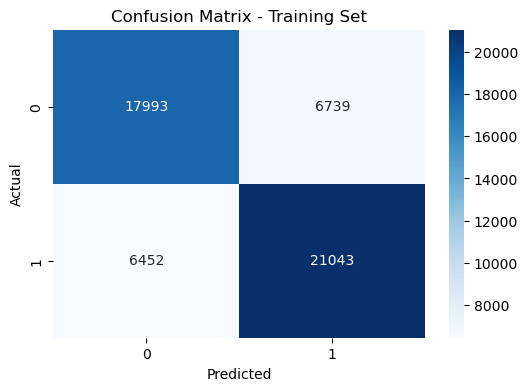

In [250]:
# Create confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(df_pred['Actual_Stayed'], df_pred['Predicted'])

# Display as heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Training Set')
plt.show()


7.2.11 Create variables for true positive, true negative, false positive and false negative <font color="red">[1 Mark]</font>

In [251]:
# Create variables for true positive, true negative, false positive and false negative
# Compute confusion matrix
cm = confusion_matrix(df_pred['Actual_Stayed'], df_pred['Predicted'])

# Extract TN, FP, FN, TP
tn, fp, fn, tp = cm.ravel()

print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")


True Negatives: 17993
False Positives: 6739
False Negatives: 6452
True Positives: 21043


7.2.12 Calculate sensitivity and specificity of model  <font color="red">[2 Marks]</font>

In [252]:
# Calculate sensitivity
sensitivity = tp / (tp + fn)
print(f"Sensitivity (Recall): {sensitivity:.4f}")


Sensitivity (Recall): 0.7653


In [253]:
# Calculate specificity
specificity = tn / (tn + fp)
print(f"Specificity: {specificity:.4f}")


Specificity: 0.7275


7.2.13 Calculate precision and recall of model <font color="red">[2 Marks]</font>

In [254]:
# Calculate precision
precision = tp / (tp + fp)
print(f"Precision: {precision:.4f}")


Precision: 0.7574


In [255]:
# Calculate recall
recall = tp / (tp + fn)
print(f"Recall (Sensitivity): {recall:.4f}")


Recall (Sensitivity): 0.7653


### **7.3 Find the optimal cutoff** <font color = red>[15 marks]</font>

Find the optimal cutoff to improve model performance. While a default threshold of 0.5 was used for initial evaluation, optimising this threshold can enhance the model's performance.

First, plot the ROC curve and check AUC.



7.3.1 Plot ROC curve <font color="red">[3 Marks]</font>

In [256]:
# Define ROC function
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

def plot_roc(y_true, y_probs):
    fpr, tpr, thresholds = roc_curve(y_true, y_probs)
    auc = roc_auc_score(y_true, y_probs)

    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.4f})', color='blue')
    plt.plot([0,1], [0,1], 'k--', label='Random Classifier')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate (Recall)')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

    return fpr, tpr, thresholds, auc


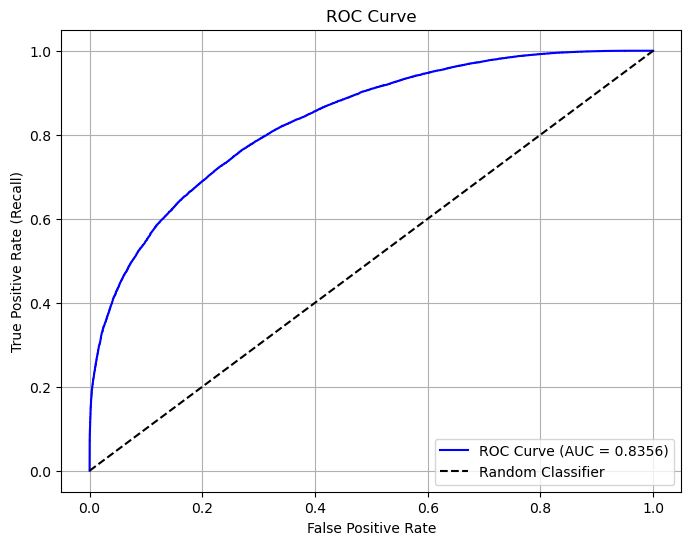

In [257]:
# Call the ROC function
fpr, tpr, thresholds, auc = plot_roc(df_pred['Actual_Stayed'], df_pred['Predicted_Prob'])


**Sensitivity and Specificity tradeoff**

Check sensitivity and specificity tradeoff to find the optimal cutoff point.

7.3.2 Predict on training set at various probability cutoffs <font color="red">[1 Mark]</font>

In [258]:
# Predict on training data by creating columns with different probability cutoffs to explore the impact of cutoff on model performance
# Predict on training data by creating columns with different probability cutoffs
cutoffs = [0.3, 0.4, 0.5, 0.6, 0.7]

for cutoff in cutoffs:
    df_pred[f'Predicted_{cutoff}'] = (df_pred['Predicted_Prob'] > cutoff).astype(int)


7.3.3 Plot for accuracy, sensitivity, specificity at different probability cutoffs <font color="red">[2 Marks]</font>

In [259]:
# Create a DataFrame to see the values of accuracy, sensitivity, and specificity at different values of probability cutoffs
from sklearn.metrics import confusion_matrix

# Define cutoff values you want to test
cutoffs = [0.3, 0.4, 0.5, 0.6, 0.7]

# Create a list to hold metric results
metrics_list = []

# Loop through each cutoff
for cutoff in cutoffs:
    # Get predicted labels at current cutoff
    pred_col = f'Predicted_{cutoff}'
    predicted = df_pred[pred_col]

    # Calculate confusion matrix values
    tn, fp, fn, tp = confusion_matrix(df_pred['Actual_Stayed'], predicted).ravel()

    # Calculate metrics
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) != 0 else 0

    # Append to list
    metrics_list.append({
        'Cutoff': cutoff,
        'Accuracy': round(accuracy, 4),
        'Sensitivity': round(sensitivity, 4),
        'Specificity': round(specificity, 4)
    })

# Convert to DataFrame
cutoff_metrics_df = pd.DataFrame(metrics_list)

# Display the DataFrame
print(cutoff_metrics_df)



   Cutoff  Accuracy  Sensitivity  Specificity
0     0.3    0.7147       0.9101       0.4974
1     0.4    0.7378       0.8414       0.6226
2     0.5    0.7474       0.7653       0.7275
3     0.6    0.7394       0.6707       0.8158
4     0.7    0.7179       0.5599       0.8935


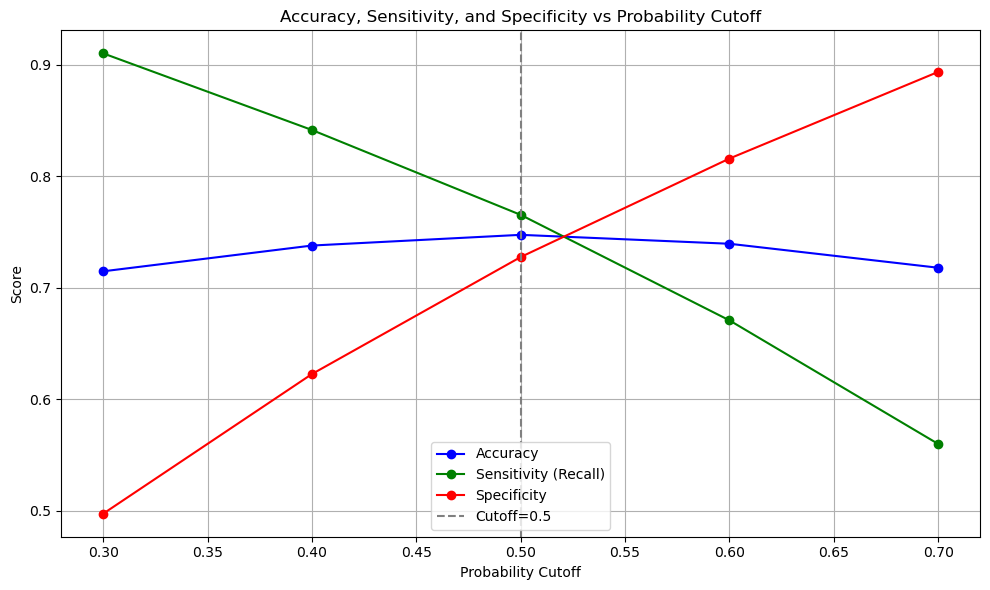

In [260]:
# Plot accuracy, sensitivity, and specificity at different values of probability cutoffs
plt.figure(figsize=(10,6))
plt.plot(cutoff_metrics_df["Cutoff"],cutoff_metrics_df["Accuracy"],label="Accuracy",marker="o",color="blue")
plt.plot(cutoff_metrics_df["Cutoff"],cutoff_metrics_df["Sensitivity"],label="Sensitivity (Recall)",marker="o",color="green")
plt.plot(cutoff_metrics_df["Cutoff"],cutoff_metrics_df["Specificity"],label="Specificity",marker="o",color="red")
plt.axvline(x=0.5,color="grey",linestyle="--",label='Cutoff=0.5')
plt.title('Accuracy, Sensitivity, and Specificity vs Probability Cutoff')
plt.xlabel("Probability Cutoff")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


7.3.4 Create a column for final prediction based on the optimal cutoff <font color="red">[2 Marks]</font>

In [261]:
# Create a column for final prediction based on the optimal cutoff
# Define your optimal cutoff (adjust this value based on your analysis)
# Define the optimal cutoff
optimal_cutoff = 0.45

# Create the Final_Predicted column using the correct column name
df_pred['Final_Predicted'] = (df_pred['Predicted_Prob'] > optimal_cutoff).astype(int)

# Display the updated DataFrame
df_pred[['Actual_Stayed', 'Predicted_Prob', 'Final_Predicted']].head()




,Actual_Stayed,Predicted_Prob,Final_Predicted
60704,0,0.036385,0
16163,0,0.044673,0
25709,1,0.693836,1
4354,0,0.296530,0
49862,0,0.339792,0


7.3.5 Calculate model's accuracy <font color="red">[1Mark]</font>

In [262]:
# Calculate the accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(df_pred['Actual_Stayed'], df_pred['Final_Predicted'])
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.7455


7.3.6 Create confusion matrix <font color="red">[1Mark]</font>

In [263]:
# Create the confusion matrix once again
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(df_pred['Actual_Stayed'], df_pred['Final_Predicted'])

print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[16756  7976]
 [ 5318 22177]]


7.3.7 Create variables for true positive, true negative, false positive and false negative <font color="red">[1Mark]</font>

In [264]:
# Create variables for true positive, true negative, false positive and false negative
TN, FP, FN, TP = cm.ravel()

print(f"True Negative: {TN}")
print(f"False Positive: {FP}")
print(f"False Negative: {FN}")
print(f"True Positive: {TP}")


True Negative: 16756
False Positive: 7976
False Negative: 5318
True Positive: 22177


7.3.8 Calculate sensitivity and specificity of the model <font color="red">[1Mark]</font>

In [265]:
# Calculate Sensitivity
sensitivity = TP / (TP + FN)
print(f"Sensitivity: {sensitivity:.4f}")


Sensitivity: 0.8066


In [266]:
# Calculate Specificity
specificity = TN / (TN + FP)
print(f"Specificity: {specificity:.4f}")


Specificity: 0.6775


7.3.9 Calculate precision and recall of the model <font color="red">[1Mark]</font>

In [267]:
# Calculate Precision
precision = TP / (TP + FP)
print(f"Precision: {precision:.4f}")


Precision: 0.7355


In [268]:
# Calculate Recall
recall = TP / (TP + FN)
print(f"Recall: {recall:.4f}")


Recall: 0.8066


**Precision and Recall tradeoff**

Check optimal cutoff value by plotting precision-recall curve, and adjust the cutoff based on the precision and recall tradeoff if required.

In [269]:
# Import precision-recall curve function
from sklearn.metrics import precision_recall_curve

In [270]:
# Check actual and predicted values from initial model
# Display the first few rows of actual vs predicted probabilities and predicted classes
df_pred[['Actual_Stayed', 'Predicted_Prob', 'Predicted']].head()


,Actual_Stayed,Predicted_Prob,Predicted
60704,0,0.036385,0
16163,0,0.044673,0
25709,1,0.693836,1
4354,0,0.296530,0
49862,0,0.339792,0


7.3.10 Plot precision-recall curve <font color="red">[2 Marks]</font>

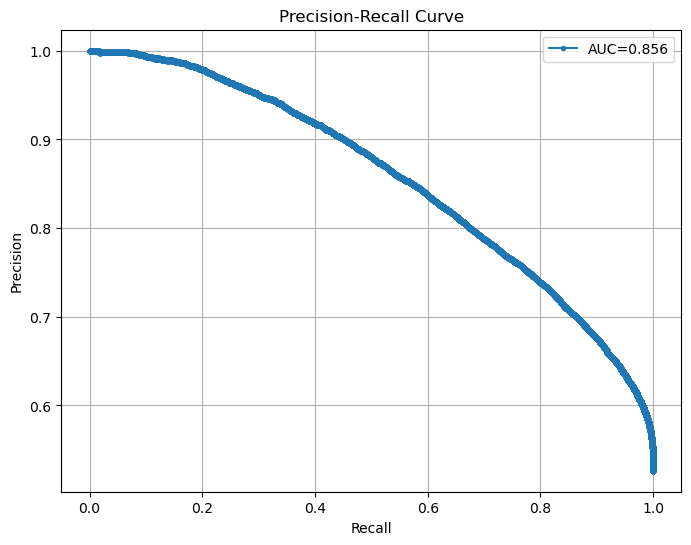

In [271]:
# Plot precision-recall curve
y_true=df_pred["Actual_Stayed"]
y_scores=df_pred["Predicted_Prob"]
del auc
from sklearn.metrics import auc
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
auc_precision_recall = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker=".", label=f'AUC={auc_precision_recall:.3f}')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid(True)
plt.show()



## **8. Prediction and Model Evaluation** <font color = red>[30 marks]</font>

Use the model from the previous step to make predictions on the validation set with the optimal cutoff. Then evaluate the model's performance using metrics such as accuracy, sensitivity, specificity, precision, and recall.

### **8.1 Make predictions over validation set** <font color = red>[15 marks]</font>

8.1.1 Select relevant features for validation set <font color="red">[2 Marks]</font>



In [272]:
# Select the relevant features for validation set
X_test_encoded=pd.get_dummies(X_test)
X_test_encoded=X_test_encoded.reindex(columns=selected_features,fill_value=0)
X_test_selected=X_test_encoded
X_test_selected.head()

,Years at Company,Number of Promotions,Distance from Home,Number of Dependents,Work-Life Balance_Fair,Work-Life Balance_Poor,Education Level_PhD,Marital Status_Single,Job Level_Mid,Job Level_Senior,Company Reputation_Fair,Company Reputation_Poor,Gender_Male,Overtime_Yes,Remote Work_Yes
61539,43,0,53.0,0,False,False,True,True,False,True,False,False,True,False,True
42583,6,0,31.0,3,False,False,False,False,True,False,False,False,False,True,False
55936,15,0,55.0,3,False,False,False,True,False,False,False,False,True,False,False
66035,18,2,42.0,0,True,False,False,False,True,False,False,False,False,False,False
23119,22,1,50.0,2,True,False,False,True,False,False,False,True,True,False,False


8.1.2 Add constant to X_validation <font color="red">[2 Marks]</font>

In [273]:
# Add constant to X_validation
X_val=sm.add_constant(X_test_selected,has_constant="add")
X_val.head()


,const,Years at Company,Number of Promotions,Distance from Home,Number of Dependents,Work-Life Balance_Fair,Work-Life Balance_Poor,Education Level_PhD,Marital Status_Single,Job Level_Mid,Job Level_Senior,Company Reputation_Fair,Company Reputation_Poor,Gender_Male,Overtime_Yes,Remote Work_Yes
61539,1.0,43,0,53.0,0,False,False,True,True,False,True,False,False,True,False,True
42583,1.0,6,0,31.0,3,False,False,False,False,True,False,False,False,False,True,False
55936,1.0,15,0,55.0,3,False,False,False,True,False,False,False,False,True,False,False
66035,1.0,18,2,42.0,0,True,False,False,False,True,False,False,False,False,False,False
23119,1.0,22,1,50.0,2,True,False,False,True,False,False,False,True,True,False,False


8.1.3 Make predictions over validation set <font color="red">[3 Marks]</font>

In [274]:
# Make predictions on the validation set and store it in the variable 'y_validation_pred'
# Predict probabilities on validation set
import statsmodels.api as sm

# Add constant again to be sure
X_val_rfe_const = sm.add_constant(X_val_rfe, has_constant='add')

# Ensure numeric type and no NaNs/infs
X_val_rfe_const = X_val_rfe_const.astype(float)
assert X_val_rfe_const.notnull().all().all(), "There are nulls in the features!"
assert np.isfinite(X_val_rfe_const).all().all(), "There are infinite values in the features!"

# Now predict
model = LogisticRegression(class_weight="balanced")
y_validation_pred_prob = result.predict(X_val_rfe_const)
y_validation_pred_prob

61539    0.896048
42583    0.684186
55936    0.122991
66035    0.442582
23119    0.023000
           ...   
60911    0.418866
38306    0.912557
57813    0.110295
4886     0.324044
41608    0.651767
Length: 22383, dtype: float64

8.1.4 Create DataFrame with actual values and predicted values for validation set <font color="red">[5 Marks]</font>

In [275]:
# Convert 'y_validation_pred' to a DataFrame 'predicted_probability'
predicted_probability=pd.DataFrame({"Predicted Probability":y_validation_pred_prob})
predicted_probability.reset_index(drop=True,inplace=True)
# Convert 'y_validation' to DataFrame 'actual'
actual = pd.DataFrame({"Actual": y_test.values.flatten()})
actual.reset_index(drop=True,inplace=True)
# Remove index from both DataFrames 'actual' and 'predicted_probability' to append them side by side
val_result=pd.concat([actual,predicted_probability],axis=1)

8.1.5 Predict final prediction based on the cutoff value <font color="red">[3 Marks]</font>

In [276]:
val_result=pd.concat([actual,predicted_probability],axis=1)
cutoff=0.45
val_result["final_prediction"]=(val_result["Predicted Probability"]>0.3).astype(int)
# Check the DataFrame
print(val_result)

       Actual  Predicted Probability  final_prediction
0      Stayed               0.896048                 1
1      Stayed               0.684186                 1
2        Left               0.122991                 0
3        Left               0.442582                 1
4        Left               0.023000                 0
...       ...                    ...               ...
22378  Stayed               0.418866                 1
22379  Stayed               0.912557                 1
22380    Left               0.110295                 0
22381    Left               0.324044                 1
22382    Left               0.651767                 1

[22383 rows x 3 columns]


### **8.2 Calculate accuracy of the model** <font color = red>[2 marks]</font>

In [277]:
# Calculate the overall accuracy
print("Type of y_test:", type(y_test))
print("Shape of y_test:", getattr(y_test, 'shape', 'No shape attribute'))
print("First 5 rows of y_test:\n", y_test[:5])

Type of y_test: <class 'pandas.core.frame.DataFrame'>
Shape of y_test: (22383, 1)
First 5 rows of y_test:
       Attrition
61539    Stayed
42583    Stayed
55936      Left
66035      Left
23119      Left


### **8.3 Create confusion matrix and create variables for true positive, true negative, false positive and false negative** <font color = red>[5 marks]</font>

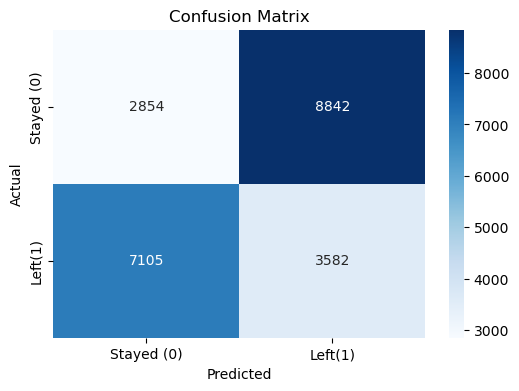

In [278]:
# Create confusion matrix
val_result["Actual_numeric"]=val_result["Actual"].map({"Stayed":0,"Left":1})
cm=confusion_matrix(val_result["Actual_numeric"],val_result["final_prediction"])
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=["Stayed (0)","Left(1)"],yticklabels=["Stayed (0)","Left(1)"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [279]:
# Create variables for true positive, true negative, false positive and false negative
TN,FP,FN,TP=cm.ravel()
print(f"True Negative (TN): {TN}")
print(f"False Positive (FP): {FP}")
print(f"False Negative (FN): {FN}")
print(f"True Positive (TP): {TP}")

True Negative (TN): 2854
False Positive (FP): 8842
False Negative (FN): 7105
True Positive (TP): 3582


### **8.4 Calculate sensitivity and specificity** <font color = red>[4 marks]</font>

In [280]:
# Calculate sensitivity
sensitivity=TP/(TP+FN)
print(f"Sensitivity:{sensitivity:.4f}")

Sensitivity:0.3352


In [281]:
# Calculate specificity
specificity=TN/(TN+FP)
print(f"Specificity:{specificity:.4f}")

Specificity:0.2440


### **8.5 Calculate precision and recall** <font color = red>[4 marks]</font>

In [282]:
# Calculate precision
precision=TP/(TP+FP)
print(f"Precision: {precision:.4f}")

Precision: 0.2883


In [283]:
#Calculate recall
recall=TP/(TP+FN)
print(f"Recall: {recall:.4f}")

Recall: 0.3352


## Conclusion

The model predicts employee attrition with moderate accuracy  and precision, indicating it misses some cases of actual attrition. While there is room for improvement, this project successfully demonstrates the modeling process and evaluation techniques. Future work can focus on better features and algorithms to improve performance.